In [26]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline
import matplotlib.pyplot as plt


In [27]:
# Define the model name
model_name = "SamLowe/roberta-base-go_emotions"

# Load the tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Load the pre-trained model
model = AutoModelForSequenceClassification.from_pretrained(model_name)


C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\transformers\tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [28]:
# List of emotion labels in the GoEmotions dataset
emotion_labels = [
    'admiration', 'amusement', 'anger', 'annoyance', 'approval',
    'caring', 'confusion', 'curiosity', 'desire', 'disappointment',
    'disapproval', 'disgust', 'embarrassment', 'excitement', 'fear',
    'gratitude', 'grief', 'joy', 'love', 'nervousness',
    'optimism', 'pride', 'realization', 'relief', 'remorse',
    'sadness', 'surprise', 'neutral'
]

print(f"Number of emotion labels: {len(emotion_labels)}")
print("Emotion Labels:")
for label in emotion_labels:
    print(f"- {label}")


Number of emotion labels: 28
Emotion Labels:
- admiration
- amusement
- anger
- annoyance
- approval
- caring
- confusion
- curiosity
- desire
- disappointment
- disapproval
- disgust
- embarrassment
- excitement
- fear
- gratitude
- grief
- joy
- love
- nervousness
- optimism
- pride
- realization
- relief
- remorse
- sadness
- surprise
- neutral


In [29]:
def filter_emotions(emotion_scores, threshold=0.1, exclude_neutral=True):
    """
    Filters emotions based on a threshold and optionally excludes 'neutral'.

    Parameters:
    - emotion_scores (list): List of dictionaries with 'label' and 'score'.
    - threshold (float): Minimum score to consider an emotion active.
    - exclude_neutral (bool): Whether to exclude the 'neutral' emotion.

    Returns:
    - List of tuples containing (emotion_label, score).
    """
    active_emotions = []
    if not isinstance(emotion_scores, list):
        print("Error: emotion_scores is not a list.")
        return active_emotions

    for emotion in emotion_scores:
        if not isinstance(emotion, dict):
            print(f"Error: Expected a dict, got {type(emotion)} instead.")
            continue
        if exclude_neutral and emotion.get('label') == 'neutral':
            continue
        score = emotion.get('score', 0)
        label = emotion.get('label', None)
        if label is None:
            print("Error: 'label' key not found in emotion.")
            continue
        if score >= threshold:
            active_emotions.append((label, score))
    return active_emotions


In [30]:
def plot_emotion_pie_chart(emotions):
    """
    Plots a pie chart for the detected emotions.

    Parameters:
    - emotions (list): List of tuples containing (emotion_label, score).
    """
    if not emotions:
        print("No emotions to plot.")
        return
    
    # Separate labels and scores
    labels, scores = zip(*emotions)

    # Create the pie chart
    plt.figure(figsize=(10, 6))
    plt.pie(scores, labels=labels, autopct='%1.1f%%', startangle=90)
    plt.title("Detected Emotions")
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    # Show the pie chart
    plt.show()


In [31]:
# Initialize the emotion classification pipeline
emotion_classifier = pipeline(
    "text-classification",
    model=model,
    tokenizer=tokenizer,
    return_all_scores=True,      # Returns scores for all labels
    function_to_apply='sigmoid'  # For multi-label classification
)


C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\transformers\pipelines\text_classification.py:104: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


In [32]:
def analyze_user_text():
    """
    Prompts the user to input text and analyzes the emotions present.
    Continues to prompt until the user decides to exit.
    """
    print("=== Emotion Detection Chatbot ===")
    print("Type 'exit' to quit.\n")
    
    while True:
        # Prompt user for input
        user_text = input("You: ")
        
        # Exit condition
        if user_text.lower() == 'exit':
            print("Chatbot: Goodbye!")
            break
        
        # Perform emotion analysis
        results = emotion_classifier(user_text)
        
        # Process emotions
        active_emotions = filter_emotions(results[0], threshold=0.1)
        
        # Display results
        if active_emotions:
            print("Chatbot: Detected Emotions:")
            for label, score in active_emotions:
                print(f"  - {label}: {score:.4f}")
            
            # Plot the pie chart
            plot_emotion_pie_chart(active_emotions)
        else:
            print("Chatbot: No significant emotions detected.")
        
        print("\n")


=== Emotion Detection Chatbot ===
Type 'exit' to quit.



You:  Fuck off


Chatbot: Detected Emotions:
  - anger: 0.8082


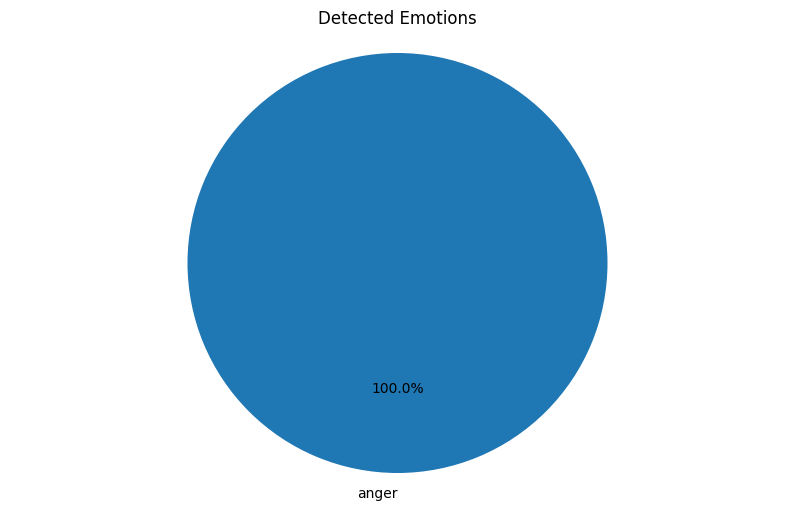

You:  The sun dipped below the horizon, casting a golden glow that filled her heart with warmth, yet the approaching darkness stirred an unfamiliar chill of anxiety. She smiled, recalling a moment of joy shared with loved ones, but tears welled up as the weight of past regrets quietly surfaced. Her chest tightened with hope for the future, though uncertainty clouded her mind, leaving her unsure of the path ahead. In that fleeting instant, a bittersweet symphony of emotions swirled within, a delicate dance of happiness, sorrow, hope, and fear.


Chatbot: Detected Emotions:
  - caring: 0.1235
  - joy: 0.2324
  - nervousness: 0.4184
  - sadness: 0.2497


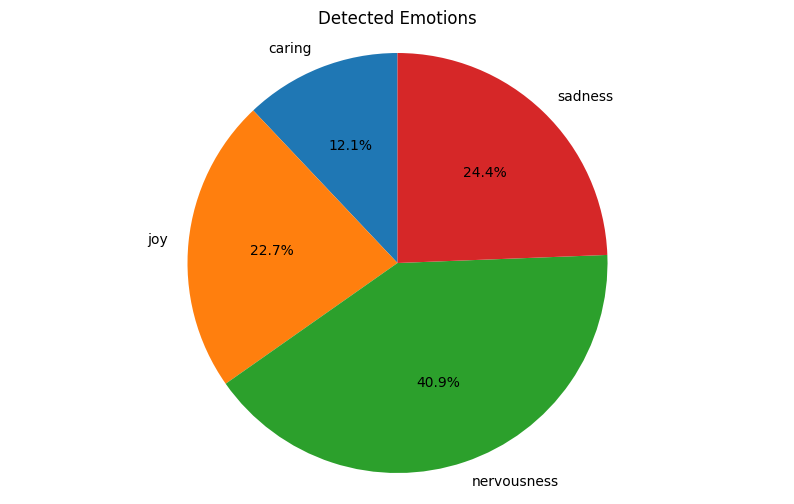

You:  exit


Chatbot: Goodbye!


In [33]:
analyze_user_text()
